## Problem Definition

## Import required Pre-requisite

In [68]:
import warnings
warnings.filterwarnings(action='ignore')

In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Loading

In [71]:
df = pd.read_csv('Football Data.csv')
df.sample(5)

,Player Img Link,Name,Country,Country Flag,Position,Age,Overall rating,Potential,Team Logo,Team Name,Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined Date,Loan date end,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Traits_1,Traits_2,PlayStyles,PlayStyles +,Number of playstyles,Acceleration Type,Year
197891,https://cdn.sofifa.net/players/170/229/22_180.png,L. Prosser,England,https://cdn.sofifa.net/flags/gb-eng@3x.png,CB,33,60,60,https://cdn.sofifa.net/meta/team/409/90.png,Stevenage,2020 ~ 2022,170229,"191cm / 6'3""",79kg / 174lbs,Left,60,CB,0,10-08-2020,NaN,€120K,€2K,€210K,187,30,27,59,55,16,177,34,19,29,48,47,226,49,37,41,57,42,278,42,72,62,85,17,215,63,55,23,37,37,57,174,58,59,57,56,10,12,13,13,8,1313,285,2,2,Low,High,1,Lean (185+),No,42,28,42,41,58,74,Team player,NaN,[],NaN,1,NaN,2022
163944,https://cdn.sofifa.net/players/193/683/21_180.png,X. Chavalerin,France,https://cdn.sofifa.net/flags/fr@3x.png,CDM,29,77,77,https://cdn.sofifa.net/meta/team/1028/90.png,Stade de Reims,2017 ~ 2022,193683,"178cm / 5'10""",66kg / 146lbs,Left,77,CDM,0,22-06-2017,NaN,€9M,€26K,€18M,322,68,60,55,80,59,364,71,70,72,75,76,342,61,64,67,74,76,360,75,61,90,70,64,347,72,78,60,74,63,66,211,70,73,68,53,11,15,6,14,7,1999,421,3,3,Medium,High,1,Lean (170-185),No,63,64,75,73,71,75,NaN,NaN,[],NaN,0,NaN,2021
45758,https://cdn.sofifa.net/players/215/994/18_180.png,A. Cherevko,Russia,https://cdn.sofifa.net/flags/ru@3x.png,RWB,29,65,65,https://cdn.sofifa.net/meta/team/9808/90.png,SKA Khabarovsk,2016 ~ 2018,215994,"170cm / 5'7""",68kg / 150lbs,Right,64,RWB,0,01-07-2016,NaN,€400K,€7K,€620K,288,63,56,49,61,59,295,65,56,52,58,64,358,73,75,70,55,85,242,62,30,59,42,49,281,39,67,61,59,55,62,200,68,65,67,61,11,13,15,9,13,1725,366,3,2,Medium,Medium,1,Normal (170-),No,74,56,60,66,65,45,NaN,NaN,[],NaN,0,NaN,2018
161588,https://cdn.sofifa.net/players/233/886/21_180.png,R. Castellucci,Germany,https://cdn.sofifa.net/flags/de@3x.png,GK,23,58,64,https://cdn.sofifa.net/meta/team/1331/90.png,Saarbrücken,2019 ~ 2021,233886,"186cm / 6'1""",80kg / 176lbs,Right,58,GK,6,01-07-2019,NaN,€250K,€650,€413K,56,12,7,9,22,6,76,15,12,8,20,21,165,25,32,31,33,44,203,42,71,20,64,6,90,27,8,7,35,13,37,50,30,9,11,296,61,59,56,58,62,936,325,3,1,Medium,Medium,1,Normal (185+),No,61,59,56,62,29,58,NaN,NaN,[],NaN,0,NaN,2021
83641,https://cdn.sofifa.net/players/243/840/19_180.png,L. O'Connor,Republic of Ireland,https://cdn.sofifa.net/flags/ie@3x.png,LB,17,63,81,https://cdn.sofifa.net/meta/team/14/90.png,Manchester United,2018 ~ 2021,243840,"178cm / 5'10""",75kg / 165lbs,Right,62,LB,18,01-07-2018,NaN,€650K,€7K,€1.6M,268,55,46,62,65,40,264,61,53,31,56,63,340,75,72,70,53,70,282,52,63,64,65,38,259,61,58,51,55,34,65,185,63,62,60,57,12,12,11,8,14,1655,363,3,2,Medium,High,1,Normal (170-185),No,73,45,57,63,61,64,Speed dribbler (AI),NaN,[],NaN,1,NaN,2019


## Data Preprocessing

#### Data Cleaning

In [72]:
# Shape
df.shape

(293966, 86)

In [73]:
df.columns

Index(['Player Img Link', 'Name', 'Country', 'Country Flag', 'Position', 'Age',
       'Overall rating', 'Potential', 'Team Logo', 'Team Name', 'Contract',
       'ID', 'Height', 'Weight', 'foot', 'Best overall', 'Best position',
       'Growth', 'Joined Date', 'Loan date end', 'Value', 'Wage',
       'Release clause', 'Total attacking', 'Crossing', 'Finishing',
       'Heading accuracy', 'Short passing', 'Volleys', 'Total skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control',
       'Total movement', 'Acceleration', 'Sprint speed', 'Agility',
       'Reactions', 'Balance', 'Total power', 'Shot power', 'Jumping',
       'Stamina', 'Strength', 'Long shots', 'Total mentality', 'Aggression',
       'Interceptions', 'Att. Position', 'Vision', 'Penalties', 'Composure',
       'Total defending', 'Defensive awareness', 'Standing tackle',
       'Sliding tackle', 'Total goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 

In [74]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293966 entries, 0 to 293965
Data columns (total 86 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Player Img Link           293966 non-null  object
 1   Name                      293966 non-null  object
 2   Country                   293966 non-null  object
 3   Country Flag              293966 non-null  object
 4   Position                  293966 non-null  object
 5   Age                       293966 non-null  int64 
 6   Overall rating            293966 non-null  int64 
 7   Potential                 293966 non-null  int64 
 8   Team Logo                 293946 non-null  object
 9   Team Name                 291062 non-null  object
 10  Contract                  293966 non-null  object
 11  ID                        293966 non-null  int64 
 12  Height                    293966 non-null  object
 13  Weight                    293966 non-null  object
 14  foot

In [75]:
# Check for duplicates
df.duplicated().sum()

32316

In [76]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

PlayStyles +                293771
Traits_2                    273652
Loan date end               270974
Acceleration Type           257043
Traits_1                    176332
Team Name                     2904
Team Logo                       20
Player Img Link                  0
Defensive awareness              0
GK Kicking                       0
GK Handling                      0
GK Diving                        0
Total goalkeeping                0
Sliding tackle                   0
Standing tackle                  0
Vision                           0
Total defending                  0
Composure                        0
Penalties                        0
GK Reflexes                      0
Att. Position                    0
Interceptions                    0
Aggression                       0
Total mentality                  0
GK Positioning                   0
Skill moves                      0
Total Stats                      0
Base stats                       0
Number of playstyles

In [77]:
# Columns to drop -> property_name, link, property_id
df.drop(columns=['Player Img Link', 'Country Flag', 'Team Logo', 'Contract', 'ID', 'Joined Date', 'Loan date end', 'Real face', 'Traits_1', 'Traits_2', 'PlayStyles', 'PlayStyles +', 'Acceleration Type',], inplace=True)

In [78]:
df.head(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles,Year
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,"185cm / 6'1""",80kg / 176lbs,Right,91,ST,0,€87M,€575K,€0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4,2017
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,"170cm / 5'7""",72kg / 159lbs,Left,92,CAM,0,€89M,€575K,€0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6,2017
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,"175cm / 5'9""",68kg / 150lbs,Right,89,LW,2,€106M,€450K,€0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5,2017
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,"182cm / 6'0""",86kg / 190lbs,Right,88,ST,0,€83M,€525K,€0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal (170-185),82,90,79,87,42,81,3,2017
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,"193cm / 6'4""",92kg / 203lbs,Right,89,GK,0,€69.5M,€225K,€0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal (185+),89,90,95,89,60,91,4,2017


In [79]:
# Check for duplicates
df.duplicated().sum()

38623

In [80]:
df.shape

(293966, 73)

In [81]:
# Split the 'Contract' column and create new columns 'contract start' and 'contract end'
# df[['contract start', 'contract end']] = df['Contract'].str.split('~', expand=True)

In [82]:
# Remove any extra whitespace and convert to integers
# df['contract start'] = df['contract start'].str.strip().astype(int)
# df['contract end'] = df['contract end'].str.strip().astype(int)

In [83]:
# Split at '/' and keep the first part (height in cm)
df['Height'] = df['Height'].str.split('/').str[0]

# Remove 'cm'
df['Height'] = df['Height'].str.replace('cm', '').str.strip()

# Convert to int type
df['Height'] =df['Height'].astype(int)

In [84]:
# Split at '/' and keep the first part (weight in kg)
df['Weight'] = df['Weight'].str.split('/').str[0]

# Remove 'kg'
df['Weight'] = df['Weight'].str.replace('kg', '').str.strip()

# Convert to int type
df['Weight'] =df['Weight'].astype(int)

In [85]:
df.head(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles,Year
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,185,80,Right,91,ST,0,€87M,€575K,€0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4,2017
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,170,72,Left,92,CAM,0,€89M,€575K,€0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6,2017
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,175,68,Right,89,LW,2,€106M,€450K,€0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5,2017
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,182,86,Right,88,ST,0,€83M,€525K,€0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal (170-185),82,90,79,87,42,81,3,2017
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,193,92,Right,89,GK,0,€69.5M,€225K,€0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal (185+),89,90,95,89,60,91,4,2017


In [86]:
df['Value'].value_counts()

Value
€1.1M      8464
€1.2M      7479
€1M        6594
€1.3M      6310
€325K      5707
€475K      5566
€1.6M      5362
€1.4M      5333
€500K      5331
€300K      5302
€275K      5260
€400K      4933
€525K      4842
€350K      4789
€425K      4762
€1.5M      4711
€375K      4698
€550K      4651
€450K      4567
€575K      4562
€1.9M      3982
€725K      3946
€600K      3944
€700K      3742
€1.8M      3741
€625K      3737
€750K      3679
€250K      3572
€850K      3547
€675K      3482
€825K      3393
€650K      3349
€1.7M      3257
€775K      3213
€900K      3171
€0         3116
€2M        2837
€875K      2769
€800K      2767
€2.1M      2762
€2.3M      2721
€925K      2704
€950K      2604
€5.5M      2486
€2.2M      2458
€975K      2454
€2.5M      2395
€130K      2381
€2.4M      2295
€100K      2245
€6M        2245
€180K      2224
€110K      2200
€220K      2178
€240K      2152
€200K      2141
€160K      2109
€210K      2065
€6.5M      2053
€140K      2048
€120K      2036
€230K      2032
€1

In [87]:
df['Wage'].value_counts()

Wage
€2K      46545
€1K      29891
€500     28926
€3K      28817
€4K      19855
€5K      14886
€6K      11998
€10K      9087
€7K       8916
€15K      7609
€8K       7363
€20K      7200
€9K       6307
€30K      4657
€0        2884
€11K      2707
€40K      2555
€12K      2433
€13K      2137
€850      2090
€600      1971
€750      1932
€550      1922
€900      1916
€650      1900
€14K      1832
€950      1831
€800      1819
€700      1794
€50K      1667
€16K      1583
€17K      1459
€18K      1441
€19K      1189
€21K      1096
€60K      1017
€22K       970
€23K       956
€24K       938
€26K       832
€25K       789
€27K       681
€28K       621
€70K       616
€29K       614
€31K       544
€34K       494
€32K       492
€33K       487
€80K       430
€90K       417
€35K       414
€36K       412
€38K       386
€37K       380
€100K      368
€39K       362
€43K       314
€110K      311
€44K       302
€41K       292
€42K       287
€46K       267
€45K       254
€49K       249
€51K       247
€47K 

In [88]:
#Cleaning to Value column and convert to decimal(all the value in K)
df["Value"] = df["Value"].str.replace("€","")
df["Value"] = df["Value"].str.replace("K","")
df.loc[df["Value"].str.contains("M"),"Value"] = df["Value"].str.split("M").str[0].astype(float)*1000

In [89]:
df["Value"] = df["Value"].astype(int)

In [90]:
df['Value'].value_counts()

Value
1100      8464
1200      7479
1000      6594
1300      6310
325       5707
475       5566
1600      5362
1400      5333
500       5331
300       5302
275       5260
400       4933
525       4842
350       4789
425       4762
1500      4711
375       4698
550       4651
450       4567
575       4562
1900      3982
725       3946
600       3944
700       3742
1800      3741
625       3737
750       3679
250       3572
850       3547
675       3482
825       3393
650       3349
1700      3257
775       3213
900       3171
0         3116
2000      2837
875       2769
800       2767
2100      2762
2300      2721
925       2704
950       2604
5500      2486
2200      2458
975       2454
2500      2395
130       2381
2400      2295
100       2245
6000      2245
180       2224
110       2200
220       2178
240       2152
200       2141
160       2109
210       2065
6500      2053
140       2048
120       2036
230       2032
170       2029
150       2021
190       1982
2700      1829
7000

In [91]:
df.head(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles,Year
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,185,80,Right,91,ST,0,87000,€575K,€0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4,2017
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,170,72,Left,92,CAM,0,89000,€575K,€0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6,2017
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,175,68,Right,89,LW,2,106000,€450K,€0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5,2017
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,182,86,Right,88,ST,0,83000,€525K,€0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal (170-185),82,90,79,87,42,81,3,2017
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,193,92,Right,89,GK,0,69500,€225K,€0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal (185+),89,90,95,89,60,91,4,2017


In [92]:
#Cleaning Wage column and convert to decimal 
df["Wage"] = df["Wage"].str.replace("€","")
df.loc[df["Wage"].str.contains("K"),"Wage"]=df["Wage"].str.split("K").str[0].astype(float)*1000

In [93]:
df["Wage"] = df["Wage"].astype(int)

In [94]:
df['Release clause'].value_counts()

Release clause
€0         57870
€1.1M       7866
€1.2M       6863
€1.3M       6323
€1.4M       5682
€1.5M       5506
€1.6M       5038
€1.7M       4399
€1.8M       4250
€1M         4156
€2M         3927
€1.9M       3640
€2.1M       3095
€2.3M       3027
€2.2M       2734
€2.6M       2590
€2.4M       2393
€2.5M       2371
€3M         2168
€2.7M       2042
€2.9M       1971
€3.2M       1895
€2.8M       1694
€3.1M       1575
€3.4M       1501
€3.8M       1494
€3.6M       1485
€3.5M       1434
€3.3M       1245
€4M         1165
€4.6M       1103
€4.1M       1079
€3.7M       1042
€4.4M       1026
€4.8M        974
€3.9M        959
€4.3M        923
€4.2M        902
€5.3M        822
€4.5M        808
€5.1M        801
€5M          784
€4.9M        746
€656K        690
€5.5M        650
€5.4M        648
€5.7M        607
€563K        592
€569K        585
€4.7M        583
€6.3M        572
€5.9M        572
€5.8M        565
€831K        558
€6.1M        526
€6.5M        526
€5.6M        509
€438K        509

In [95]:
#Cleaning Release_Clause column and convert to decimal (release clause value in euro with k)
df["Release clause"] = df["Release clause"].str.replace("€","")
df["Release clause"] = df["Release clause"].str.replace("K","")
df.loc[df["Release clause"].str.contains("M"),"Release clause"] = df["Release clause"].str.split("M").str[0].astype(float)*1000
df["Release clause"] = df["Release clause"].astype(int)

In [96]:
df['Body type'].value_counts()

Body type
Normal (170-185)    100712
Lean (170-185)       63904
Normal (185+)        63446
Lean (185+)          30998
Normal (170-)        10041
Stocky (170-185)      9354
Lean (170-)           6829
Stocky (185+)         5916
Stocky (170-)         1626
Unique                1140
Name: count, dtype: int64

In [97]:
# Remove the range 
df['Body type'] = df['Body type'].str.replace(r'\s*\(\d+-\d+\)', '', regex=True)
df['Body type'] = df['Body type'].str.replace(r'\s*\(.*?\)', '', regex=True)
df['Body type'] = df['Body type'].str.replace(r'\s*\(\d+-\)', '', regex=True)

In [98]:
df['Body type'].value_counts()

Body type
Normal    174199
Lean      101731
Stocky     16896
Unique      1140
Name: count, dtype: int64

In [99]:
df.head(10)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles,Year
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,185,80,Right,91,ST,0,87000,575000,0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4,2017
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,170,72,Left,92,CAM,0,89000,575000,0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6,2017
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,175,68,Right,89,LW,2,106000,450000,0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5,2017
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,182,86,Right,88,ST,0,83000,525000,0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal,82,90,79,87,42,81,3,2017
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,193,92,Right,89,GK,0,69500,225000,0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal,89,90,95,89,60,91,4,2017
5,De Gea,Spain,GK,25,90,92,Manchester United,193,82,Right,87,GK,2,68500,190000,0,103,17,13,21,39,13,127,18,21,19,38,31,306,57,58,60,88,43,214,31,67,40,64,12,188,38,30,12,68,40,64,47,13,21,13,436,88,85,87,86,90,1421,494,3,1,Medium,Medium,4,Lean,88,85,87,90,58,86,1,2017
6,R. Lewandowski,Poland,ST,27,90,90,FC Bayern München,185,79,Right,87,ST,0,71000,250000,0,407,62,91,85,83,86,390,85,77,76,65,87,406,79,82,78,88,79,415,86,84,79,84,82,367,80,39,89,78,81,87,86,25,42,19,51,15,6,12,8,10,2122,447,4,3,High,Medium,4,Normal,81,87,74,85,38,82,3,2017
7,G. Bale,Wales,RW,26,90,90,Real Madrid,183,74,Left,88,ST,0,72000,375000,0,422,87,87,86,86,76,428,89,86,85,80,88,417,93,95,77,87,65,424,91,85,78,80,90,365,65,59,86,79,76,85,158,51,55,52,52,15,15,11,5,6,2266,485,3,4,High,Medium,4,Lean,94,87,84,86,57,77,6,2017
8,Z. Ibrahimović,Sweden,ST,34,90,90,Manchester United,195,95,Right,86,ST,0,36500,300000,0,423,76,90,80,84,93,415,85,82,82,76,90,352,68,72,86,85,41,421,93,72,75,93,88,364,84,20,86,83,91,91,83,15,41,27,59,13,15,10,9,12,2117,443,4,4,Medium,Low,5,Normal,70,90,81,84,32,86,6,2017
9,T. Courtois,Belgium,GK,24,89,92,Chelsea,199,91,Left,86,GK,3,65500,170000,0,85,14,14,13,32,12,97,13,19,11,31,23,285,46,52,61,81,45,229,36,68,38,70,17,122,23,15,13,44,27,52,45,11,18,16,419,84,91,69,86,89,1282,468,3,1,Medium,Medium,4,Unique,84,91,69,89,49,86,2,2017


In [100]:
df.sample(10)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles,Year
172789,H. Ortega,Mexico,CB,20,65,78,Toluca,190,77,Right,67,CB,13,1600,6000,0,212,27,29,72,55,29,199,46,26,26,50,51,249,56,55,36,54,48,268,40,80,62,65,21,264,82,58,42,37,45,52,193,62,68,63,54,8,15,5,11,15,1439,307,3,2,Medium,High,1,Lean,55,31,42,47,64,68,0,2021
207798,Han Kook Young,Korea Republic,CM,31,68,68,Gangwon,183,76,Right,69,CDM,0,1000,4000,1300,262,59,42,63,72,26,318,63,53,66,70,66,348,67,69,71,65,76,332,56,57,90,75,54,311,65,69,56,72,49,63,195,63,67,65,52,10,10,10,9,13,1818,390,3,3,Medium,Medium,1,Normal,68,47,68,65,66,76,3,2022
287337,M. Crocombe,New Zealand,GK,29,64,64,Burton Albion,194,88,Right,64,GK,0,400,1000,700,115,24,14,23,34,20,112,16,19,21,35,21,252,46,49,54,61,42,222,46,61,38,58,19,139,41,25,12,40,21,45,52,10,21,21,314,64,63,61,62,64,1206,361,2,1,Medium,Medium,1,Normal,64,63,61,64,47,62,0,2024
158975,G. Stensness,New Zealand,CDM,21,62,70,Central Coast Mariners,185,82,Right,63,CDM,8,850,500,1200,214,37,37,51,63,26,231,53,31,33,57,57,274,54,57,50,61,52,311,51,60,81,75,44,264,69,58,43,52,42,60,174,55,60,59,39,13,7,6,6,7,1507,335,3,2,Medium,Medium,1,Normal,56,41,52,54,57,75,0,2021
180498,C. Barbu,Romania,ST,20,55,68,Argeş,183,71,Right,57,ST,13,300,1000,593,228,36,57,44,49,42,223,60,43,31,34,55,306,63,68,69,51,55,282,57,65,54,55,51,207,26,15,54,54,58,47,41,16,12,13,54,9,8,15,14,8,1341,290,2,2,Medium,Medium,1,Lean,66,55,44,59,17,49,1,2021
16416,G. Delaney,Republic of Ireland,CB,22,55,62,Wexford,189,73,Right,54,CB,7,110,500,0,156,27,21,53,31,24,129,21,20,23,32,33,271,67,62,46,42,54,250,45,54,63,70,18,197,49,53,28,28,39,48,173,56,59,58,42,5,12,11,5,9,1218,269,2,2,Medium,Medium,1,Normal,64,27,29,30,56,63,0,2017
33194,K. Ahearne-Grant,England,ST,18,57,74,Charlton Athletic,183,70,Right,56,ST,17,230,2000,0,232,38,54,52,49,39,211,52,39,35,31,54,347,81,83,68,55,60,285,53,71,62,57,42,225,36,25,57,52,55,51,67,20,23,24,63,11,10,13,15,14,1430,313,3,2,High,Low,1,Normal,82,51,44,55,26,55,0,2017
292455,P. Passador,Italy,GK,20,56,64,Torino,196,90,Left,56,GK,8,275,3000,523,115,11,12,30,45,17,109,11,18,10,30,40,223,36,40,60,52,35,222,41,62,40,65,14,105,25,15,5,40,20,38,66,20,22,24,277,55,50,54,56,62,1117,315,2,1,Medium,Medium,1,Normal,55,50,54,62,38,56,0,2024
155705,C. Grant,England,CM,25,65,68,Plymouth Argyle,184,76,Left,67,CM,3,950,4000,1700,289,64,58,59,65,43,321,63,66,64,63,65,346,68,65,77,62,74,341,68,63,80,65,65,287,65,61,63,64,34,61,181,61,62,58,53,7,6,13,15,12,1818,386,3,3,Medium,Medium,1,Normal,66,60,64,66,61,69,0,2021
147556,S. Sunzu,Zambia,CB,31,73,73,Cangzhou Mighty Lions,192,80,Right,73,CB,0,2100,8000,3300,226,36,23,76,56,35,242,39,47,43,56,57,265,38,45,58,66,58,355,50,82,74,92,57,266,74,70,34,42,46,67,218,72,74,72,60,14,15,12,9,10,1632,333,3,3,Medium,Medium,1,Stocky,42,38,48,49,73,83,2,2021


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293966 entries, 0 to 293965
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Name                      293966 non-null  object
 1   Country                   293966 non-null  object
 2   Position                  293966 non-null  object
 3   Age                       293966 non-null  int64 
 4   Overall rating            293966 non-null  int64 
 5   Potential                 293966 non-null  int64 
 6   Team Name                 291062 non-null  object
 7   Height                    293966 non-null  int32 
 8   Weight                    293966 non-null  int32 
 9   foot                      293966 non-null  object
 10  Best overall              293966 non-null  int64 
 11  Best position             293966 non-null  object
 12  Growth                    293966 non-null  int64 
 13  Value                     293966 non-null  int32 
 14  Wage

In [102]:
df.isnull().sum().sort_values(ascending=False)

Team Name                   2904
Name                           0
Composure                      0
GK Handling                    0
GK Diving                      0
Total goalkeeping              0
Sliding tackle                 0
Standing tackle                0
Defensive awareness            0
Total defending                0
Penalties                      0
GK Positioning                 0
Vision                         0
Att. Position                  0
Interceptions                  0
Aggression                     0
Total mentality                0
Long shots                     0
GK Kicking                     0
GK Reflexes                    0
Stamina                        0
Pace / Diving                  0
Number of playstyles           0
Physical / Positioning         0
Defending / pace               0
Dribbling / Reflexes           0
Passing / Kicking              0
Shooting / Handling            0
Body type                      0
Total Stats                    0
Internatio

In [103]:
df = df.dropna(subset=['Team Name'])

In [104]:
df.isnull().sum().sort_values(ascending=False)

Name                        0
Stamina                     0
GK Handling                 0
GK Diving                   0
Total goalkeeping           0
Sliding tackle              0
Standing tackle             0
Defensive awareness         0
Total defending             0
Composure                   0
Penalties                   0
Vision                      0
Att. Position               0
Interceptions               0
Aggression                  0
Total mentality             0
Long shots                  0
GK Kicking                  0
GK Positioning              0
GK Reflexes                 0
Pace / Diving               0
Number of playstyles        0
Physical / Positioning      0
Defending / pace            0
Dribbling / Reflexes        0
Passing / Kicking           0
Shooting / Handling         0
Body type                   0
Total Stats                 0
International reputation    0
Defensive work rate         0
Attacking work rate         0
Skill moves                 0
Weak foot 

In [105]:
# Check duplicate rows
df.duplicated().sum()

38060

In [106]:
# Remove duplicate rows
df = df.drop_duplicates()

In [107]:
# Check duplicate rows
df.duplicated().sum()

0

In [108]:
df.shape

(253002, 73)

In [109]:
df.columns

Index(['Name', 'Country', 'Position', 'Age', 'Overall rating', 'Potential',
       'Team Name', 'Height', 'Weight', 'foot', 'Best overall',
       'Best position', 'Growth', 'Value', 'Wage', 'Release clause',
       'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy',
       'Short passing', 'Volleys', 'Total skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
       'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength',
       'Long shots', 'Total mentality', 'Aggression', 'Interceptions',
       'Att. Position', 'Vision', 'Penalties', 'Composure', 'Total defending',
       'Defensive awareness', 'Standing tackle', 'Sliding tackle',
       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base stats',
       'Weak foot', 'Skill moves', 'Attacking work rate',
       'Defensive 

In [110]:
cols = ['Country', 'Position', 'Age', 'Overall rating', 'Potential', 'Height', 'Weight', 'foot', 'Best overall', 'Best position', 'Growth', 'Value', 'Wage', 'Release clause',
       'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy','Short passing', 'Volleys', 'Total skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance', 'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots', 'Total mentality', 'Aggression', 'Interceptions',
       'Att. Position', 'Vision', 'Penalties', 'Composure', 'Total defending', 'Defensive awareness', 'Standing tackle', 'Sliding tackle', 'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base stats','Weak foot', 'Skill moves', 'Attacking work rate', 'Defensive work rate', 'International reputation', 'Body type',
       'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking','Dribbling / Reflexes', 'Defending / pace', 'Physical / Positioning','Number of playstyles']
value_counts = {col: df[col].value_counts() for col in cols}

In [111]:
value_counts

{'Country': Country
 England                     23091
 Germany                     15279
 Spain                       14470
 Argentina                   13574
 France                      13078
 Brazil                      10103
 Italy                        8047
 Colombia                     6647
 Netherlands                  6077
 Japan                        5607
 United States                5541
 Republic of Ireland          5314
 Sweden                       5299
 Norway                       5126
 Portugal                     4993
 Korea Republic               4913
 Poland                       4887
 Denmark                      4715
 Saudi Arabia                 4215
 China PR                     4138
 Austria                      4002
 Belgium                      3959
 Chile                        3954
 Türkiye                      3878
 Scotland                     3865
 Mexico                       3699
 Australia                    3355
 Uruguay                      3341


In [112]:
df['Year'].value_counts()

Year
2020    36952
2021    32919
2022    32378
2019    31558
2023    31362
2024    29964
2018    29291
2017    28578
Name: count, dtype: int64

In [113]:
# Reset the index
df = df.reset_index(drop=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253002 entries, 0 to 253001
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Name                      253002 non-null  object
 1   Country                   253002 non-null  object
 2   Position                  253002 non-null  object
 3   Age                       253002 non-null  int64 
 4   Overall rating            253002 non-null  int64 
 5   Potential                 253002 non-null  int64 
 6   Team Name                 253002 non-null  object
 7   Height                    253002 non-null  int32 
 8   Weight                    253002 non-null  int32 
 9   foot                      253002 non-null  object
 10  Best overall              253002 non-null  int64 
 11  Best position             253002 non-null  object
 12  Growth                    253002 non-null  int64 
 13  Value                     253002 non-null  int32 
 14  Wage

In [115]:
df.sample(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles,Year
109424,R. Olsen,Sweden,GK,29,78,78,Cagliari,196,86,Right,77,GK,0,7500,33000,0,95,20,11,16,32,16,100,11,18,16,37,18,209,31,40,32,73,33,223,57,40,37,75,14,141,27,20,13,55,26,45,50,22,12,16,387,78,77,76,78,78,1205,423,2,1,Medium,Medium,1,Normal,78,77,76,78,36,78,0,2020
105612,D. Nussbaumer,Austria,CAM,19,59,70,Rheindorf Altach,188,71,Right,60,CAM,11,250,1000,413,250,48,53,52,62,35,261,59,53,34,53,62,293,57,64,63,55,54,284,64,50,62,61,47,258,56,48,53,56,45,52,135,46,48,41,45,11,6,9,14,5,1526,336,3,2,Medium,Medium,1,Lean,61,53,55,60,47,60,0,2020
236158,U. Godwin-Malife,England,CB,23,62,66,Swindon Town,180,79,Right,64,CB,4,525,2000,958,217,48,29,57,58,25,236,57,38,29,55,57,351,78,76,70,59,68,296,39,86,69,72,30,252,60,62,43,53,34,55,183,61,62,60,51,11,12,14,9,5,1586,351,3,2,High,Medium,1,Normal,77,32,52,59,61,70,1,2024
197261,L. Alzugaray,Argentina,RM,32,69,69,LDU Quito,176,69,Left,69,RM,0,1100,550,2400,314,65,68,60,68,53,336,69,59,72,67,69,338,68,71,65,71,63,302,70,48,67,50,67,317,52,55,68,71,71,72,158,57,54,47,46,12,11,10,6,7,1811,385,3,4,Medium,Medium,1,Lean,70,68,68,69,55,55,1,2023
238884,M. Jaime,Argentina,LM,19,59,72,Newell's Old Boys,172,66,Right,60,RM,13,525,1000,1100,260,51,53,50,56,50,248,61,52,31,47,57,339,73,76,64,58,68,248,49,51,58,44,46,217,27,24,60,48,58,45,49,17,19,13,42,13,5,9,9,6,1403,303,3,3,Medium,Medium,1,Normal,75,51,51,60,22,44,0,2024


In [116]:
df['Country'].value_counts()

Country
England                     23091
Germany                     15279
Spain                       14470
Argentina                   13574
France                      13078
Brazil                      10103
Italy                        8047
Colombia                     6647
Netherlands                  6077
Japan                        5607
United States                5541
Republic of Ireland          5314
Sweden                       5299
Norway                       5126
Portugal                     4993
Korea Republic               4913
Poland                       4887
Denmark                      4715
Saudi Arabia                 4215
China PR                     4138
Austria                      4002
Belgium                      3959
Chile                        3954
Türkiye                      3878
Scotland                     3865
Mexico                       3699
Australia                    3355
Uruguay                      3341
Romania                      2923
Switze

In [117]:
df['Position'].value_counts()

Position
CB     43853
ST     35785
CM     30164
GK     26554
CDM    20465
RB     17970
LB     17781
CAM    14733
RM     14583
LM     14379
RW      5648
LW      5448
LWB     2043
RWB     1991
CF      1605
Name: count, dtype: int64

In [118]:
df['Team Name'].value_counts()

Team Name
Everton                       687
River Plate                   682
Liverpool                     634
Universidad Católica          518
Manchester United             512
Chelsea                       484
Leicester City                480
Borussia Dortmund             478
Real Valladolid               469
Burnley                       467
Crystal Palace                464
Fulham                        463
Arsenal                       461
Nantes                        460
Real Oviedo                   459
Tottenham Hotspur             459
Newcastle United              454
Granada                       453
Olympique de Marseille        453
West Ham United               452
Hamburger SV                  451
Real Madrid                   449
Atlético Madrid               446
Sporting Gijón                445
Reading                       444
Wolverhampton Wanderers       443
Brighton & Hove Albion        443
Southampton                   442
Watford                       442
Werd

In [119]:
df['foot'].value_counts()

foot
Right    192610
Left      60392
Name: count, dtype: int64

In [120]:
df['Best position'].value_counts()

Best position
CB     50632
ST     35865
CAM    30076
GK     26554
RM     19929
CDM    19070
CM     15059
RB     12409
LB     11773
LM     11322
RW      6340
RWB     5070
LWB     4669
LW      3154
CF      1080
Name: count, dtype: int64

In [121]:
df['Attacking work rate'].value_counts()

Attacking work rate
Medium    168507
High       70684
Low        13811
Name: count, dtype: int64

In [122]:
df['Defensive work rate'].value_counts()

Defensive work rate
Medium    185157
High       44732
Low        23113
Name: count, dtype: int64

In [123]:
df['Body type'].value_counts()

Body type
Normal    149119
Lean       88195
Stocky     14666
Unique      1022
Name: count, dtype: int64

## Exploratory Data Analyis

In [124]:
# sns.pairplot(df)

In [125]:
#Top 5 Valuable Player
df.nlargest(10,columns="Value")[["Name","Age","Team Name","Value", "Year"]]

,Name,Age,Team Name,Value,Year
159300,K. Mbappé,22,Paris Saint Germain,194000,2022
191676,K. Mbappé,23,Paris Saint Germain,190500,2023
210259,K. Mbappé,23,Paris Saint Germain,190500,2023
126385,K. Mbappé,21,Paris Saint Germain,185500,2021
144120,K. Mbappé,21,Paris Saint Germain,185500,2021
223038,E. Haaland,22,Manchester City,185000,2024
241568,E. Haaland,22,Manchester City,185000,2024
223039,K. Mbappé,24,Paris Saint Germain,181500,2024
191681,E. Haaland,21,Manchester City,176500,2023
210262,E. Haaland,21,Manchester City,160000,2023


In [126]:
#Top 5 Rating Player
df.nlargest(10,columns="Overall rating")[["Name","Age","Team Name","Overall rating", "Year"]]

,Name,Age,Team Name,Overall rating,Year
0,Cristiano Ronaldo,31,Real Madrid,94,2017
28578,L. Messi,30,FC Barcelona,94,2018
28579,Cristiano Ronaldo,32,Real Madrid,94,2018
46295,L. Messi,30,FC Barcelona,94,2018
46296,Cristiano Ronaldo,32,Real Madrid,94,2018
57869,L. Messi,31,FC Barcelona,94,2019
57870,Cristiano Ronaldo,33,Juventus,94,2019
75600,L. Messi,31,FC Barcelona,94,2019
89427,L. Messi,32,FC Barcelona,94,2020
108600,L. Messi,32,FC Barcelona,94,2020


In [127]:
#Mean Value (Top 5) based on Position

pd.DataFrame(df.groupby("Position").Value.mean().sort_values(ascending=False)).head(5)

,Value
Position,
CF,7478.950156
LW,4720.245044
RW,4148.122344
CAM,3530.525894
CM,3003.400743


In [128]:
#Age , Height and Weight Stats
df[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,253002.000000,253002.000000,253002.000000
mean,24.803555,181.298662,75.135513
std,4.697739,6.809268,7.024841
min,15.000000,155.000000,48.000000
25%,21.000000,176.000000,70.000000
50%,24.000000,181.000000,75.000000
75%,28.000000,186.000000,80.000000
max,54.000000,207.000000,110.000000


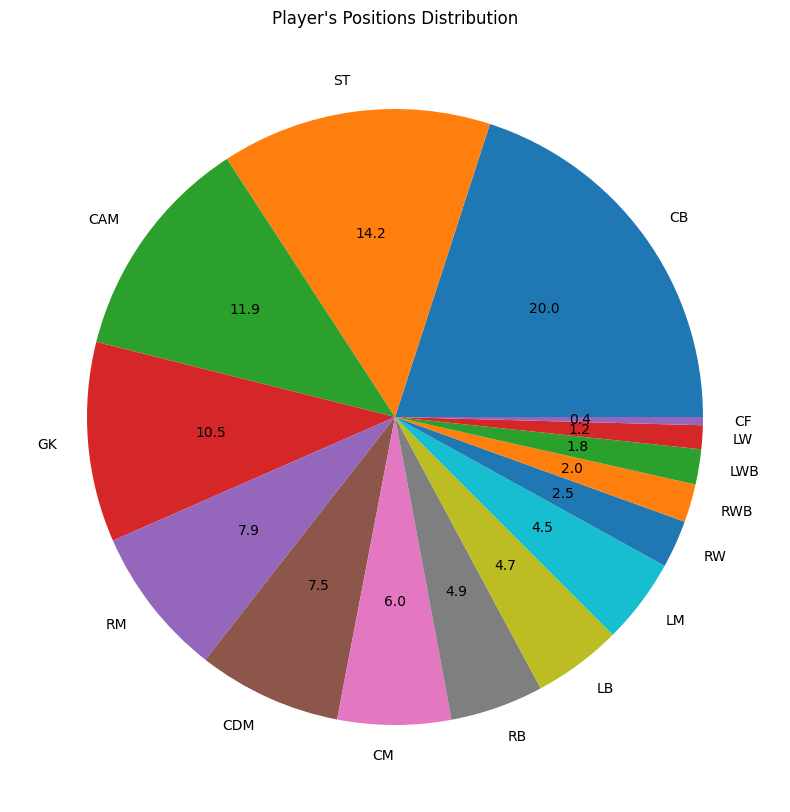

In [129]:
# Player's Positions Distribution pie chart

plt.figure(figsize=(10,10))
loc=df['Best position'].value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

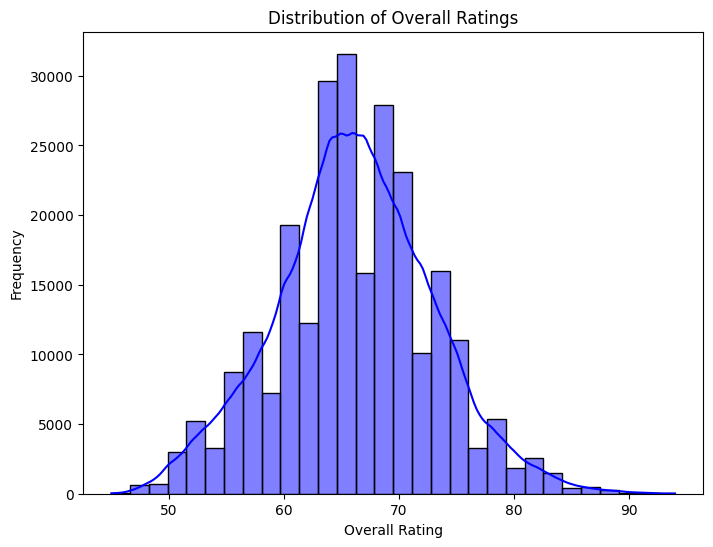

In [130]:
# Histogram for Overall rating

plt.figure(figsize=(8, 6))
sns.histplot(df['Overall rating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

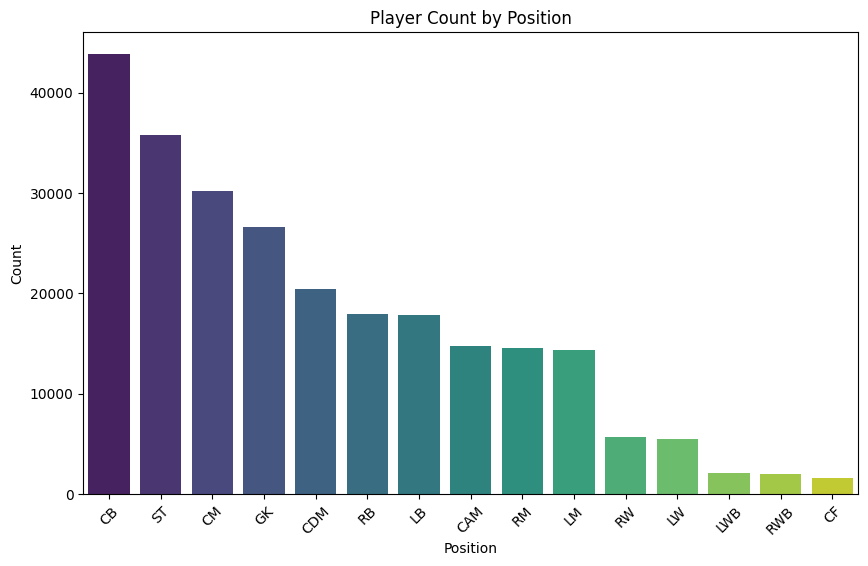

In [131]:
# Player Count by Position

plt.figure(figsize=(10, 6))
position_counts = df['Position'].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

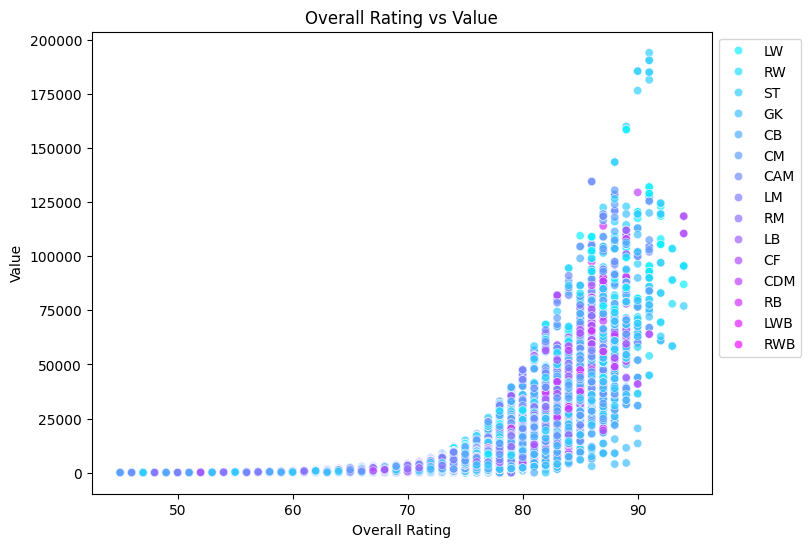

In [132]:
# Scatter Plot for Overall rating vs Value

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Overall rating', y='Value', hue='Position', palette='cool', alpha=0.7)
plt.title('Overall Rating vs Value')
plt.xlabel('Overall Rating')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Encoding

##### Label Encoding

In [137]:
df_encoded = df

from sklearn.preprocessing import LabelEncoder

object_columns = ['Country', 'Position', 'Team Name',  'Best position','foot', 'Attacking work rate', 'Defensive work rate', 'Body type']

# Create a label encoder
label_encoder = LabelEncoder()

# Encode each object column
for col in object_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

    # print(f"Category : {col}")
    # for category, label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    #     print(f"{category}: {label}")

##### One-Hot Encoding

In [134]:
# object_columns = ['foot', 'Attacking work rate', 'Defensive work rate', 'Body type']
# df_encoded = pd.get_dummies(df_encoded, columns=object_columns)

In [135]:
df_encoded.sample(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles,Year
225096,P. Onuachu,123,14,29,74,74,918,201,98,1,74,14,0,4200,42000,0,344,41,76,85,69,73,289,68,58,30,62,71,262,54,65,38,73,32,377,75,82,65,92,63,337,74,41,76,60,86,68,117,33,48,36,52,9,12,14,9,8,1778,382,3,3,0,2,1,1,60,74,58,64,45,81,3,2024
32883,B. Marshall,51,11,26,71,71,585,180,83,1,70,11,0,2500,30000,0,328,75,66,63,67,57,365,71,73,77,72,72,351,75,74,71,64,67,337,74,64,64,62,73,313,48,57,67,69,72,66,200,65,68,67,41,9,10,7,6,9,1935,409,4,3,2,2,1,1,74,69,71,71,64,60,2,2018
168551,A. Barman,177,2,27,66,67,32,175,71,0,66,2,1,875,500,1900,253,51,37,58,65,42,271,59,48,37,64,63,312,59,62,60,60,71,333,66,61,78,73,55,279,69,65,43,61,41,60,193,64,65,64,55,8,14,10,10,13,1696,365,3,2,2,2,1,1,61,47,59,61,64,73,0,2022
132546,T. Ebuehi,123,10,24,69,74,342,187,72,1,69,10,5,2000,5000,0,241,57,37,54,63,30,254,65,41,33,51,64,370,86,90,69,63,62,302,52,84,67,69,30,274,71,63,52,41,47,59,200,64,68,68,65,8,16,16,11,14,1706,380,3,2,2,0,1,1,88,40,53,65,64,70,1,2021
174233,A. Ioniță,140,6,21,61,66,223,178,65,0,61,6,5,475,1000,677,203,52,23,45,57,26,234,51,45,34,46,58,374,85,84,76,54,75,262,59,67,61,55,20,232,54,57,42,44,35,52,165,50,59,56,46,12,7,8,13,6,1516,333,2,2,2,2,1,0,84,31,50,57,54,57,0,2022


In [136]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253002 entries, 0 to 253001
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Name                      253002 non-null  object
 1   Country                   253002 non-null  int32 
 2   Position                  253002 non-null  int32 
 3   Age                       253002 non-null  int64 
 4   Overall rating            253002 non-null  int64 
 5   Potential                 253002 non-null  int64 
 6   Team Name                 253002 non-null  int32 
 7   Height                    253002 non-null  int32 
 8   Weight                    253002 non-null  int32 
 9   foot                      253002 non-null  int32 
 10  Best overall              253002 non-null  int64 
 11  Best position             253002 non-null  int32 
 12  Growth                    253002 non-null  int64 
 13  Value                     253002 non-null  int32 
 14  Wage

In [62]:
# Select only numeric columns
numeric_columns = df_encoded.select_dtypes(include=['number'])

# correlation of target column with numeric columns
# Exclude self-correlation
correlations = numeric_columns.corr()['Value'].drop('Value')  
correlations.sort_values(ascending=False)

Release clause              0.938187
Wage                        0.806239
International reputation    0.598987
Best overall                0.584032
Overall rating              0.580265
Potential                   0.539675
Reactions                   0.509732
Base stats                  0.476393
Dribbling / Reflexes        0.404831
Passing / Kicking           0.404024
Composure                   0.400109
Number of playstyles        0.354335
Total Stats                 0.354133
Vision                      0.335857
Short passing               0.308612
Shooting / Handling         0.296586
Total power                 0.294970
Long passing                0.289843
Shot power                  0.288461
Total mentality             0.285533
Total skill                 0.284428
Ball control                0.282258
Total attacking             0.276514
Curve                       0.260247
Skill moves                 0.254700
Volleys                     0.249917
Dribbling                   0.248861
T

In [63]:
df_encoded.columns

Index(['Name', 'Country', 'Position', 'Age', 'Overall rating', 'Potential',
       'Team Name', 'Height', 'Weight', 'foot', 'Best overall',
       'Best position', 'Growth', 'Value', 'Wage', 'Release clause',
       'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy',
       'Short passing', 'Volleys', 'Total skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
       'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength',
       'Long shots', 'Total mentality', 'Aggression', 'Interceptions',
       'Att. Position', 'Vision', 'Penalties', 'Composure', 'Total defending',
       'Defensive awareness', 'Standing tackle', 'Sliding tackle',
       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base stats',
       'Weak foot', 'Skill moves', 'Attacking work rate',
       'Defensive 

In [66]:
print("Category to label mapping:")
for category, label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{category}: {label}")

Category to label mapping:
Lean: 0
Normal: 1
Stocky: 2
Unique: 3


## Data Splitting

In [ ]:
# Independent columns 
X_columns = ['Release clause', 'International reputation', 'Overall rating',
            'Potential','Number of playstyles','Total Stats', 'Age', 'Year',
            'Weight', 'Height', 'Position']  

# Dependent column
y_column = 'Value'  

In [ ]:
#split the data into training and testing
X = df_encoded[X_columns]
y = df_encoded[y_column]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

## Model Building

### Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

def linear_regression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

### Ridge Regression

In [84]:
from sklearn.linear_model import Ridge

def ridge_regression():
    model = Ridge()
    model.fit(X_train, y_train)
    return model

### lasso_regression

In [85]:
from sklearn.linear_model import Lasso

def lasso_regression():
    model = Lasso()
    model.fit(X_train, y_train)
    return model

### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree():
    model = DecisionTreeRegressor(random_state=12345)
    model.fit(X_train, y_train)
    return model

### Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

def random_forest():
    model = RandomForestRegressor(n_estimators=100, random_state=12345)
    model.fit(X_train, y_train)
    return model

### XGBoost

In [88]:
from xgboost import XGBRegressor

def xgboost():
    model = XGBRegressor(random_state=12345)
    model.fit(X_train, y_train)
    return model

### Support Vector Machine

In [90]:
from sklearn.svm import SVR

def svr():
    model = SVR()
    model.fit(X_train, y_train)
    return model

### MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

def mlp_regressor():
    model = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=123456)
    model.fit(X_train, y_train)
    return model

### Deep Neural Network

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Deep Learning Model
def build_deep_learning_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    return model

## Model Evaluation

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation Function
def evaluate_models(models, X_test, y_test):

    results = []

    for name, model in models.items():
        if name == "Deep Neural Network":
            y_pred = model.predict(X_test).flatten()
        else:
            y_pred = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Append results
        results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R² Score": r2
        })

    
    # Convert results to DataFrame
    return pd.DataFrame(results)


In [94]:
models = {
    "Linear Regression": linear_regression(),
    "Ridge Regression": ridge_regression(),
    "Lasso Regression": lasso_regression(),
    "Decision Tree": decision_tree(),
    "Random Forest": random_forest(),
    "XGBoost": xgboost(),
    # "SVR": svr(),
    # "MLP Regressor": mlp_regressor()
}

# Evaluate all models
evaluation_results = evaluate_models(models, X_test, y_test)

# Display results in tabular form
evaluation_results

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,855.201005,3.841427e+06,1959.955791,0.915974
1,Ridge Regression,855.199108,3.841423e+06,1959.954799,0.915974
2,Lasso Regression,854.752933,3.841129e+06,1959.879875,0.915980
3,Decision Tree,96.332038,3.953205e+05,628.745170,0.991353
4,Random Forest,90.698813,1.890588e+05,434.808889,0.995865
5,XGBoost,123.738663,1.156859e+05,340.126332,0.997470


In [ ]:
models = {
    "SVR": svr()
}

# Evaluate all models
evaluation_results = evaluate_models(models, X_test, y_test)

# Display results in tabular form
evaluation_results

In [135]:
# Train and Evaluate Deep Learning Model
dl_model = build_deep_learning_model(X_train.shape[1])
history = dl_model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=1)
loss, mae = dl_model.evaluate(X_test, y_test, verbose=1)
print(f"Deep Learning Model MAE: {mae:.4f}")

Epoch 1/100
11385/11385 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 6130024.5000 - mae: 851.7977 - val_loss: 5502050.0000 - val_mae: 793.5404
Epoch 2/100
11385/11385 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 4027887.5000 - mae: 699.3914 - val_loss: 3996840.0000 - val_mae: 747.3716
Epoch 3/100
11385/11385 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3768509.5000 - mae: 666.4164 - val_loss: 5678345.5000 - val_mae: 952.8117
Epoch 4/100
11385/11385 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3445505.2500 - mae: 627.4075 - val_loss: 7233234.5000 - val_mae: 996.9825
Epoch 5/100
11385/11385 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2955510.0000 - mae: 594.6104 - val_loss: 10134580.0000 - val_mae: 1195.5529
Epoch 6/100
11385/11385 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2566704.2500 - mae: 571.4127 - val_loss: 5997262.5000 - val_mae: 870.0643
Epoch 7/100
11385/11385 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 2322501.2500 - mae: 544.1910 - val_loss: 7116665.5000 - val_mae: 1107.6056
Epoch 8/100
11385

In [136]:
# Evaluate Deep Learning with R²
y_pred_dl = dl_model.predict(X_test).flatten()
r2_dl = r2_score(y_test, y_pred_dl)
print(f"Deep Learning Model R²: {r2_dl:.4f}")

1582/1582 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Deep Learning Model R²: 0.7605


## Model Evaluation with With kfold

#### Kfold

In [70]:
# K-Fold Cross-Validation Function
def cross_validate_model(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=12345)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    return scores.mean(), scores.std()

In [75]:
# Regression Models
def build_models():
    return {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(random_state=12345),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=12345),
        "XGBoost": XGBRegressor(random_state=12345),
        # "SVR": SVR(),
        # "MLP Regressor": MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=12345),
    }

In [83]:
# Initialize Models
models = build_models()

# Perform Cross-Validation and Store Results
results = []
for name, model in models.items():
    mean_r2, std_r2 = cross_validate_model(model, X, y)
    results.append({"Model": name, "Mean R²": mean_r2, "Std R²": std_r2})

# Convert Results to DataFrame and Display
results_df = pd.DataFrame(results)
print(results_df)

               Model   Mean R²    Std R²
0  Linear Regression  0.911494  0.006157
1   Ridge Regression  0.911494  0.006157
2   Lasso Regression  0.911493  0.006165
3      Decision Tree  0.993627  0.000613
4      Random Forest  0.996336  0.000273
5            XGBoost  0.997247  0.000623


#### Cross Validation Curve

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, validation_curve

# Validation Curve Function
def plot_validation_curve(model, X, y, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y, param_name=param_name, param_range=param_range, cv=5, scoring='r2'
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_mean, label='Training Score', color='blue')
    plt.plot(param_range, val_mean, label='Validation Score', color='orange')
    plt.title(f'Validation Curve for {model_name}')
    plt.xlabel(param_name)
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid()
    plt.show()


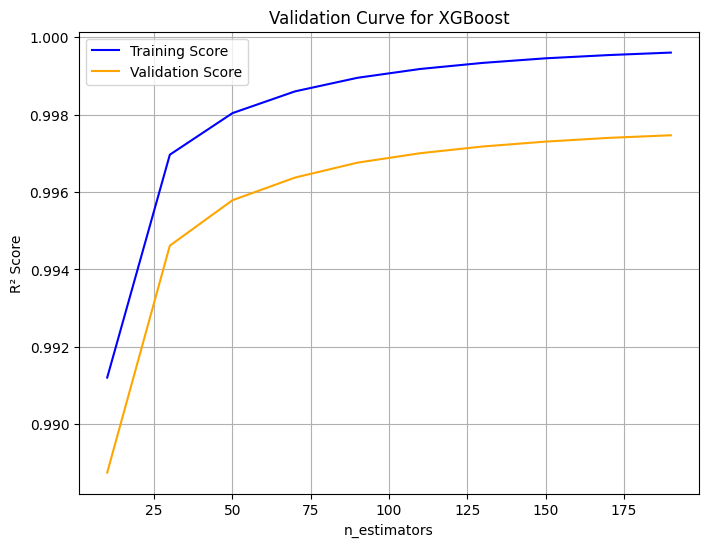

In [138]:
# Plot Validation Curve for XGBoost
plot_validation_curve(
    XGBRegressor(random_state=12345), 
    X_train, 
    y_train, 
    "n_estimators", 
    range(10, 201, 20), 
    "XGBoost"
)

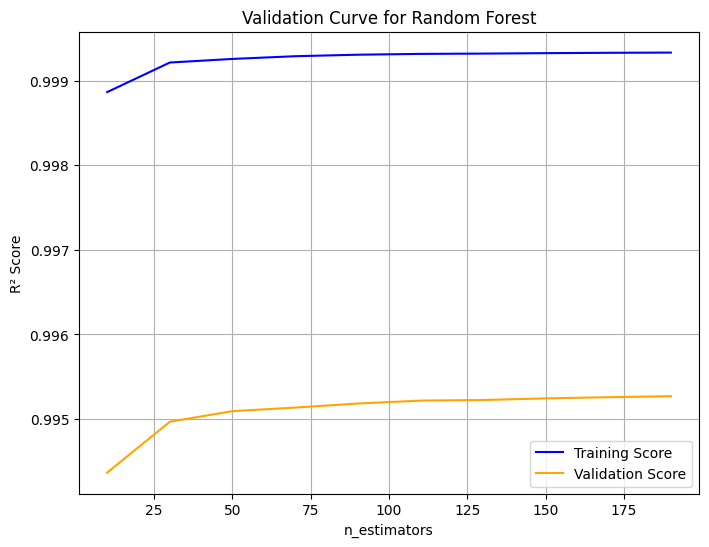

In [77]:
# Plot Validation Curve for Random Forest
plot_validation_curve(
    RandomForestRegressor(random_state=12345), 
    X_train, 
    y_train, 
    "n_estimators", 
    range(10, 201, 20), "Random Forest"
)

### PCA

In [120]:
# Independent columns 
X_columns = ['Release clause', 'International reputation', 'Overall rating',
            'Potential','Number of playstyles','Total Stats', 'Age', 'Year',
            'Weight', 'Height', 'Position']  

# Dependent column
y_column = 'Value'  

In [121]:
#split the data into training and testing
X = df_encoded[X_columns]
y = df_encoded[y_column]

#### decompose Columns

In [122]:
from sklearn.decomposition import PCA

# create an object
pca = PCA(n_components=1)

# fit the x having 2 columns
pca.fit(X)

# extract one component
x_new = pca.transform(X)

In [123]:
# split data into train and test
from sklearn.model_selection import train_test_split

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_new, y, train_size=0.7, random_state=1234)

#### Train Model

In [124]:
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()

# train the model
model.fit(x_train_p, y_train_p)

LinearRegression()

#### Visualization

In [130]:
y_pred = model.predict(x_test_p)

Text(0.5, 1.0, 'Market value prediction')

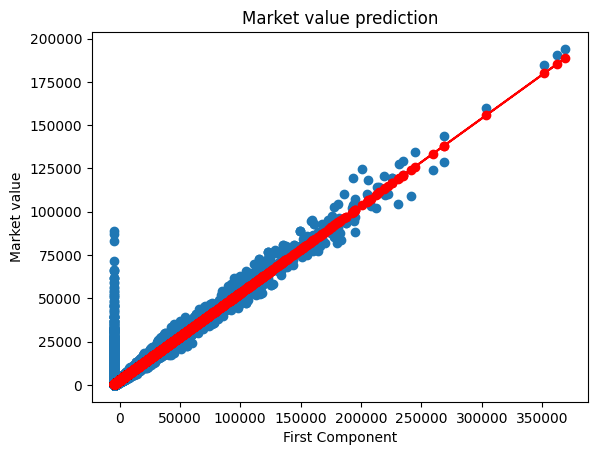

In [126]:
plt.scatter(x_test_p[:, 0], y_test_p)
plt.scatter(x_test_p[:, 0], y_pre, color="red")
plt.plot(x_test_p[:, 0], y_pre, color="red", label="Best fit Regression Line")
plt.xlabel('First Component')
plt.ylabel('Market value')
plt.title('Market value prediction')

#### Evaluate the model

In [131]:
y_true = y_test_p
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 847.911596618867
mse = 5463497.243461814
rmse = 2337.4125103331276
r2 = 0.8798815044293191


## Pickle file

In [ ]:
model = xgboost()

In [84]:
import pickle
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as xgboost_model.pkl")

Model saved successfully as xgboost_model.pkl
